## 3. Python API Training - Model Documentation [Solution]

<b>Author:</b> Thodoris Petropoulos <br>
<b>Contributors:</b> Rajiv Shah

This is the 3rd exercise to complete in order to finish your `Python API Training for DataRobot` course! This exercise will help you learn how to retrieve model insights using the Python API. These insights are normaly readily available through the UI but you can also retrieve the raw results.

Here are the actual sections of the notebook alongside time to complete: 

1. Connect to DataRobot. [3min]<br>
2. Retrieve the Project created during the `Feature Selection Curves` exercise. [5min]<br>
3. Plot Feature Impact for any trained model. Show the model's blueprint.[10min]
4. Plot any word cloud results. [10min]
5. Plot ROC Curve data for the validation partition. [10min]
6. Plot Lift Chart for the validation partition. [10min]
7. Compute Prediction explanations for the training dataset. [10min]
8. Bonus Question.

Each section will have specific instructions so do not worry if things are still blurry!

As always, consult:

- [API Documentation](https://datarobot-public-api-client.readthedocs-hosted.com)
- [Samples](https://github.com/datarobot-community/examples-for-data-scientists)
- [Tutorials](https://github.com/datarobot-community/tutorials-for-data-scientists)

The last two links should provide you with the snippets you need to complete most of these exercises.

<b>Data</b>

The dataset we will be using throughout these exercises is the well-known `readmissions dataset`. You can access it or directly download it through DataRobot's public S3 bucket [here](https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv).

### Import Libraries
Import libraries here as you start finding out what libraries are needed. The DataRobot package is already included for your convenience.

In [1]:
import datarobot as dr

#Proposed Libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Connect to DataRobot [3min]

In [2]:
#Possible solution
dr.Client(config_path='../../github/config.yaml')

### 2. Retrieve the Project created during the `Feature Selection Curves` exercise. [5min]<br>

Retrieve the project you created using the readmissions dataset and save it into a variable called `project`.

**Hint**: To use a project created in DataRobot you can either list all of the available projects using the Python api or find the ID from the web interface. For example, if you are logged into DataRobot, your browser will be pointing to a link such as this: `https//:YOUR_HOSTNAME/projects/PROJECT_ID/models/MODEL_ID`. Just copy paste the `PROJECT_ID`.

In [3]:
#Proposed Solution
project = dr.Project.get('YOUR_PROJECT_ID')

### 3. Plot Feature Impact for any trained model. Show the model's blueprint.[10min]

**Hint**: You must have the code to solve this from the previous exercise.

**Hint 2**: Use the `Model.blueprint` method for a high level representation of the Blueprint.

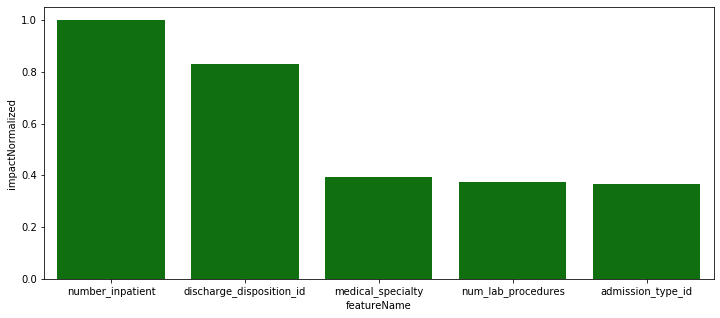

In [5]:
#Proposed Solution

#Retrieve a datarobot model object
model = project.get_models()[0]

#Request feature impact
#Get Feature Impact
feature_impact = model.get_or_request_feature_impact()

#Save feature impact in pandas dataframe
fi_df = pd.DataFrame(feature_impact)

#Plot FI
fig, ax = plt.subplots(figsize = (12,5))

#Plot feature impact
sns.barplot(x='featureName', y='impactNormalized', data=fi_df[0:5], color='g')
print(model.blueprint)

### 4. Plot any word cloud results. [10min]

**Hint**: The method to retrieve the word cloud is `get_word_cloud` and it is applied on a DataRobot Model object but not all of the models have a word cloud. Try to create a process that checks whether a model has a word cloud available and return the first available data.

**Hint 2**: There is sample script of how to plot word cloud data within [Samples](https://github.com/datarobot-community/examples-for-data-scientists).

In [40]:
#Proposed Solution

#Save all models
models = project.get_models()

#Check for word cloud
model_with_word_cloud = None
for model in models:
    try:
        wc_data = model.get_word_cloud()
        break
    except:
        pass

print(wc_data.ngrams[0:2])

[{'ngram': 'food', 'coefficient': 0.22929658048871904, 'count': 31, 'frequency': 0.012699713232281851, 'is_stopword': False, 'class': 'True', 'variable': 'NGRAM_OCCUR_L2_diag_1_desc'}, {'ngram': 'hemorrhage unspecified', 'coefficient': -0.25053669299447945, 'count': 5, 'frequency': 0.0020483408439164277, 'is_stopword': False, 'class': 'True', 'variable': 'NGRAM_OCCUR_L2_diag_1_desc'}]


In [24]:
#Plot Wordcloud

import wordcloud
from colour import Color

colors = [Color('#2458EB')]
colors.extend(list(Color('#2458EB').range_to(Color('#31E7FE'), 81))[1:])
colors.extend(list(Color('#31E7FE').range_to(Color('#8da0a2'), 21))[1:])
colors.extend(list(Color('#a18f8c').range_to(Color('#ffad9e'), 21))[1:])
colors.extend(list(Color('#ffad9e').range_to(Color('#d80909'), 81))[1:])
webcolors = [c.get_web() for c in colors]

def word_cloud_plot(wc, font_path=None):
    # Stopwords usually dominate any word cloud, so we will filter them out
    dict_freq = {wc_word['ngram']: wc_word['frequency']
                 for wc_word in wc.ngrams
                 if not wc_word['is_stopword']}
    dict_coef = {wc_word['ngram']: wc_word['coefficient']
                 for wc_word in wc.ngrams}

    def color_func(*args, **kwargs):
        word = args[0]
        palette_index = int(round(dict_coef[word] * 100)) + 100
        r, g, b = colors[palette_index].get_rgb()
        return 'rgb({:.0f}, {:.0f}, {:.0f})'.format(int(r * 255),
                                                    int(g * 255),
                                                    int(b * 255))

    wc_image = wordcloud.WordCloud(stopwords=set(),
                                   width=1024, height=1024,
                                   relative_scaling=0.5,
                                   prefer_horizontal=1,
                                   color_func=color_func,
                                   background_color=(0, 10, 29),
                                   font_path=font_path).fit_words(dict_freq)
    plt.imshow(wc_image, interpolation='bilinear')
    plt.axis('off')

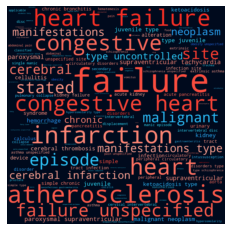

In [25]:
word_cloud_plot(wc_data)

### 5. Plot ROC Curve data for the validation partition. [10min]

**Hint**: After retrieving ROC data, call `pd.DataFrame(roc_data.roc_points)` method to transform the results into something easier to the eye.

**Hint 2**: There is a sample script of how to plot the ROC curve within [Samples](https://github.com/datarobot-community/examples-for-data-scientists).

In [34]:
# Proposed Solution

#Get roc_curve data
roc_data = model.get_roc_curve(source = 'validation')

#Create a pandas dataframe of the data
roc_df = pd.DataFrame(roc_data.roc_points)
roc_df.head()

,accuracy,f1_score,false_negative_score,false_positive_rate,false_positive_score,fraction_predicted_as_negative,fraction_predicted_as_positive,lift_negative,lift_positive,matthews_correlation_coefficient,negative_predictive_value,positive_predictive_value,threshold,true_negative_rate,true_negative_score,true_positive_rate,true_positive_score
0,0.603125,0.000000,635,0.000000,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.603125,0.000000,1.000000,1.000000,965,0.000000,0
1,0.604375,0.134063,586,0.048705,47,0.940000,0.060000,1.012016,1.286089,0.058632,0.610372,0.510417,0.519878,0.951295,918,0.077165,49
2,0.601875,0.149533,579,0.060104,58,0.928750,0.071250,1.012001,1.237740,0.053416,0.610363,0.491228,0.497003,0.939896,907,0.088189,56
3,0.603125,0.156707,576,0.061140,59,0.926250,0.073750,1.013614,1.259843,0.059477,0.611336,0.500000,0.488066,0.938860,906,0.092913,59
4,0.600000,0.164491,572,0.070466,68,0.918125,0.081875,1.012426,1.211757,0.051296,0.610619,0.480916,0.485490,0.929534,897,0.099213,63


(0, 1)

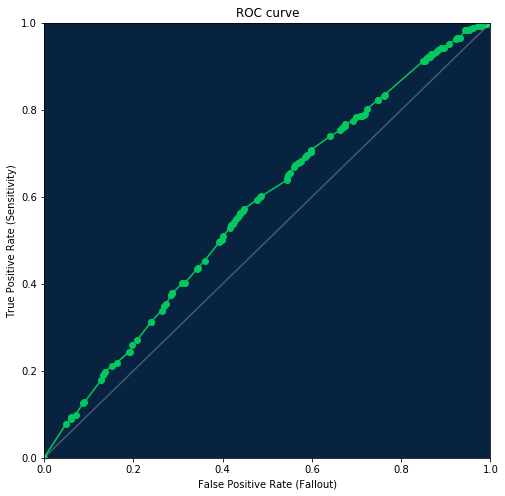

In [35]:
# Plot ROC Curve

dr_roc_green = '#03c75f'
white = '#ffffff'
dr_purple = '#65147D'
dr_dense_green = '#018f4f'
dr_dark_blue = '#08233F'

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (Fallout)')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.ylim([0, 1])

### 6. Plot Lift Chart for the validation partition. [10min]

**Hint**: There is a sample script of how to plot the lift chart within [Samples](https://github.com/datarobot-community/examples-for-data-scientists).

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


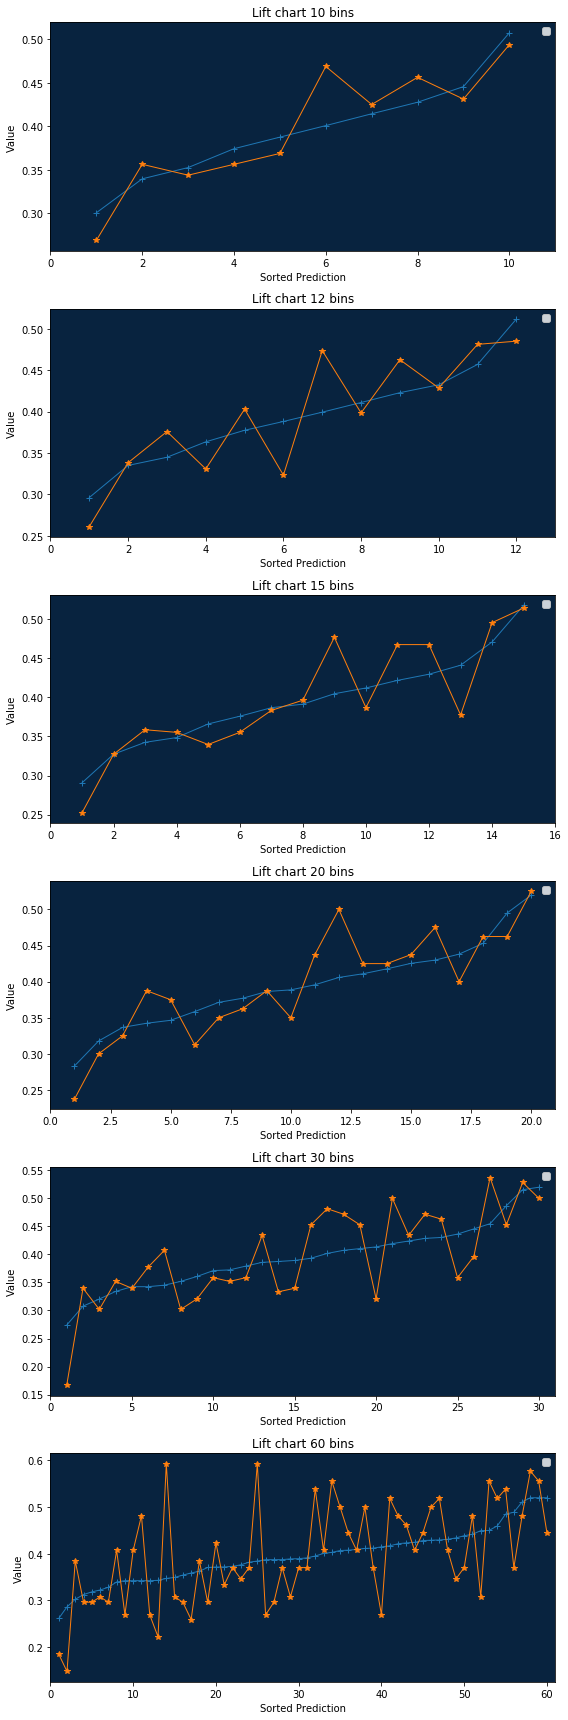

In [37]:
#Proposed Solution (Directly from community github)

lc = model.get_lift_chart(source='validation')

#Saving to pandas dataframe
bins_df = pd.DataFrame(lc.bins)
bins_df.head()

import matplotlib.ticker as mtick

#Some color
dr_dark_blue = '#08233F'
dr_blue = '#1F77B4'
dr_orange = '#FF7F0E'
dr_red = '#BE3C28'

c = model.get_lift_chart(source='validation')

#Saving to pandas dataframe
bins_df = pd.DataFrame(lc.bins)
bins_df.head()

def rebin_df(raw_df, number_of_bins):
    cols = ['bin', 'actual_mean', 'predicted_mean', 'bin_weight']
    new_df = pd.DataFrame(columns=cols)
    current_prediction_total = 0
    current_actual_total = 0
    current_row_total = 0
    x_index = 1
    bin_size = 60 / number_of_bins
    for rowId, data in raw_df.iterrows():
        current_prediction_total += data['predicted'] * data['bin_weight']
        current_actual_total += data['actual'] * data['bin_weight']
        current_row_total += data['bin_weight']

        if ((rowId + 1) % bin_size == 0):
            x_index += 1
            bin_properties = {
                'bin': ((round(rowId + 1) / 60) * number_of_bins),
                'actual_mean': current_actual_total / current_row_total,
                'predicted_mean': current_prediction_total / current_row_total,
                'bin_weight': current_row_total
            }

            new_df = new_df.append(bin_properties, ignore_index=True)
            current_prediction_total = 0
            current_actual_total = 0
            current_row_total = 0
    return new_df


def matplotlib_lift(bins_df, bin_count, ax):
    grouped = rebin_df(bins_df, bin_count)
    ax.plot(range(1, len(grouped) + 1), grouped['predicted_mean'],
            marker='+', lw=1, color=dr_blue)
    ax.plot(range(1, len(grouped) + 1), grouped['actual_mean'],
            marker='*', lw=1, color=dr_orange)
    ax.set_xlim([0, len(grouped) + 1])
    ax.set_facecolor(dr_dark_blue)
    ax.legend(loc='best')
    ax.set_title('Lift chart {} bins'.format(bin_count))
    ax.set_xlabel('Sorted Prediction')
    ax.set_ylabel('Value')
    return grouped

bin_counts = [10, 12, 15, 20, 30, 60]
f, axarr = plt.subplots(len(bin_counts))
f.set_size_inches((8, 4 * len(bin_counts)))

rebinned_dfs = []
for i in range(len(bin_counts)):
    rebinned_dfs.append(matplotlib_lift(bins_df, bin_counts[i], axarr[i]))
plt.tight_layout()

### 7. Compute Prediction explanations for the training dataset. [10min]

**Hint**: Similarly to before, there is a sample script of how to compute prediction explanations within [Samples](https://github.com/datarobot-community/examples-for-data-scientists).

In [45]:
#Proposed Solution

#Calculate FI in case it's not calculated
model.get_or_request_feature_impact()

#Uploading Training dataset
dataset_from_path = project.upload_dataset('https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv')

#Request predictions
predict_job = model.request_predictions(dataset_from_path.id)

#Waiting for prediction calculations
predictions = predict_job.get_result_when_complete()

#Initiate prediction explanations
pei = dr.PredictionExplanationsInitialization.create(project.id, model.id)
pei.get_result_when_complete()

pe_job = dr.PredictionExplanations.create(project.id, model.id,  dataset_from_path.id)

#Waiting for Job to Complete
pe = pe_job.get_result_when_complete()

df_pe = pe.get_all_as_dataframe()
df_pe.head()

,row_id,prediction,class_0_label,class_0_probability,class_1_label,class_1_probability,explanation_0_feature,explanation_0_feature_value,explanation_0_label,explanation_0_qualitative_strength,...,explanation_1_feature,explanation_1_feature_value,explanation_1_label,explanation_1_qualitative_strength,explanation_1_strength,explanation_2_feature,explanation_2_feature_value,explanation_2_label,explanation_2_qualitative_strength,explanation_2_strength
0,0,0.0,0.0,0.626309,1.0,0.373691,diag_1_desc,Spinal stenosis in cervical region,1.0,---,...,None,None,None,None,None,None,None,None,None,None
1,1,0.0,0.0,0.698038,1.0,0.301962,diag_1_desc,"First-degree perineal laceration, unspecified ...",1.0,---,...,None,None,None,None,None,None,None,None,None,None
2,2,0.0,0.0,0.632436,1.0,0.367564,diag_1_desc,Pneumococcal pneumonia [Streptococcus pneumoni...,1.0,---,...,None,None,None,None,None,None,None,None,None,None
3,3,0.0,0.0,0.584994,1.0,0.415006,diag_1_desc,Cellulitis and abscess of face,1.0,---,...,None,None,None,None,None,None,None,None,None,None
4,4,0.0,0.0,0.693435,1.0,0.306565,diag_1_desc,"Bipolar I disorder, single manic episode, unsp...",1.0,---,...,None,None,None,None,None,None,None,None,None,None


### Verification

The first n-gram that is generated should be `hepatic` and the coefficient value should be `0.17032`. Did you have the same result?

### 8. Bonus Question

DataRobot provided automated model documentation. Try to create and download the `Compliance Documentation` DOCX file.

In [49]:
# Proposed Solution

# Using the default template
doc = dr.ComplianceDocumentation(project.id, model.id)

# Start a job to generate documentation
job = doc.generate()

# Once the job is complete, download as a DOCX
job.wait_for_completion()
doc.download('downloads')